In [139]:

from mysql.connector import connect
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [140]:
conn = connect(
    host = 'mysql.laptrinhpython.net',
    user= 'hv',
    password='123456',
    database='testdb',
    port = 3306    
)
conn.is_connected()

True

In [141]:
cur = conn.cursor()
sql = 'SELECT * FROM menu' #ĐỌC BẢNG MENU
cur.execute(sql)
data = cur.fetchall()
df = pd.DataFrame(data, columns=cur.column_names)
conn.close()


In [142]:
df.head()
df.describe()
df.duplicated().sum()
# df.columns


np.int64(0)

In [143]:
df = df[['Category', 'Item',
    'Calories',
     'Total Fat',
    #    'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol','Sodium',
    #    'Sodium (% Daily Value)', 'Carbohydrates',
    #    'Carbohydrates (% Daily Value)', 'Dietary Fiber',
        'Sugars', 'Protein',
    #    'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
    #    'Calcium (% Daily Value)', 'Iron (% Daily Value)'
    ]].copy()

In [144]:
df.isna().any().any()

np.False_

In [145]:

df.loc[df.duplicated()] #kiểm tra dữ liệu trùng lặp

,Category,Item,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein


In [146]:
df.loc[~df.duplicated()].reset_index(drop=False) #xóa dữ liệu trùng lặp

,index,Category,Item,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein
0,0,Breakfast,Egg McMuffin,300,13,260,750,3,17
1,1,Breakfast,Egg White Delight,250,8,25,770,3,18
2,2,Breakfast,Sausage McMuffin,370,23,45,780,2,14
3,3,Breakfast,Sausage McMuffin with Egg,450,28,285,860,2,21
4,4,Breakfast,Sausage McMuffin with Egg Whites,400,23,50,880,2,21
...,...,...,...,...,...,...,...,...,...
255,255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,17,45,280,64,12
256,256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,23,55,380,85,15
257,257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,11,30,190,43,8
258,258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,32,60,400,103,21


In [147]:
df_nocate = df.drop(columns=['Category', 'Item']) #xóa cột Category
df_nocate.corr()

,Calories,Total Fat,Cholesterol,Sodium,Sugars,Protein
Calories,1.000000,0.904809,0.596399,0.712309,0.259598,0.787847
Total Fat,0.904809,1.000000,0.680724,0.846326,-0.114930,0.808638
Cholesterol,0.596399,0.680724,1.000000,0.624362,-0.135518,0.561561
Sodium,0.712309,0.846326,0.624362,1.000000,-0.426536,0.869802
Sugars,0.259598,-0.114930,-0.135518,-0.426536,1.000000,-0.179940
Protein,0.787847,0.808638,0.561561,0.869802,-0.179940,1.000000


<Axes: xlabel='Category'>

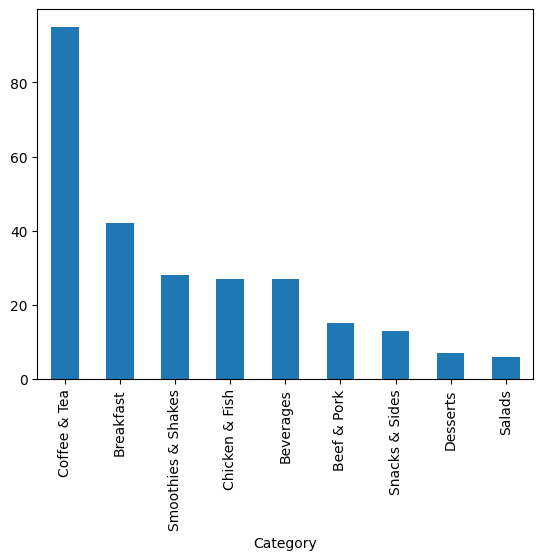

In [148]:
df['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Category'>

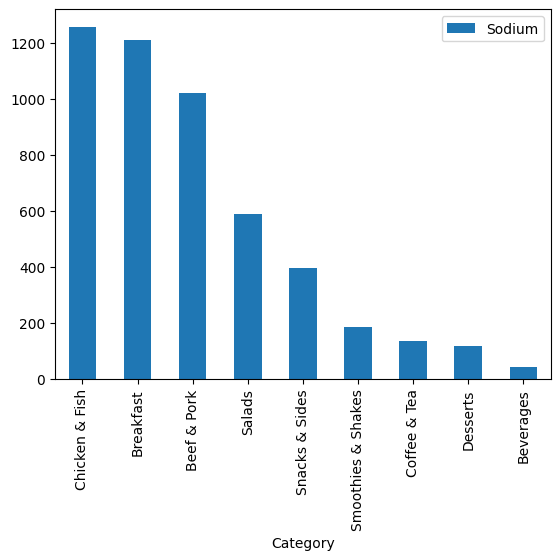

In [149]:
df[['Category', 'Sodium', 'Sugars']].groupby('Category').mean()
df[['Category', 'Sodium']].groupby('Category').mean().sort_values(by = 'Sodium', ascending=False).plot(kind='bar')

<Axes: xlabel='Category'>

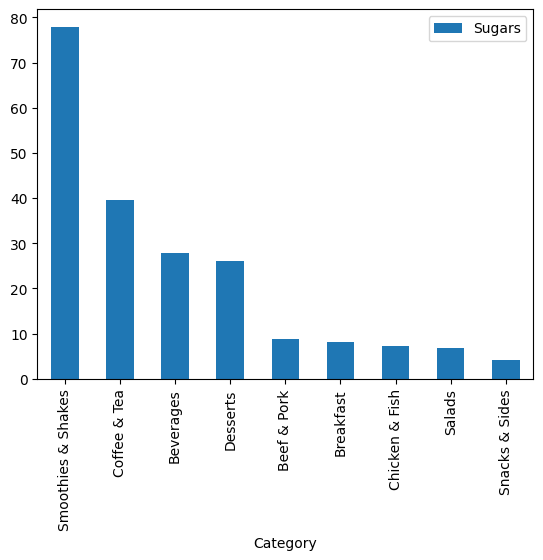

In [150]:
df[['Category', 'Sugars']].groupby('Category').mean().sort_values(by = 'Sugars', ascending=False).plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Breakfast'),
  Text(1, 0, 'Beef & Pork'),
  Text(2, 0, 'Chicken & Fish'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Snacks & Sides'),
  Text(5, 0, 'Desserts'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Coffee & Tea'),
  Text(8, 0, 'Smoothies & Shakes')])

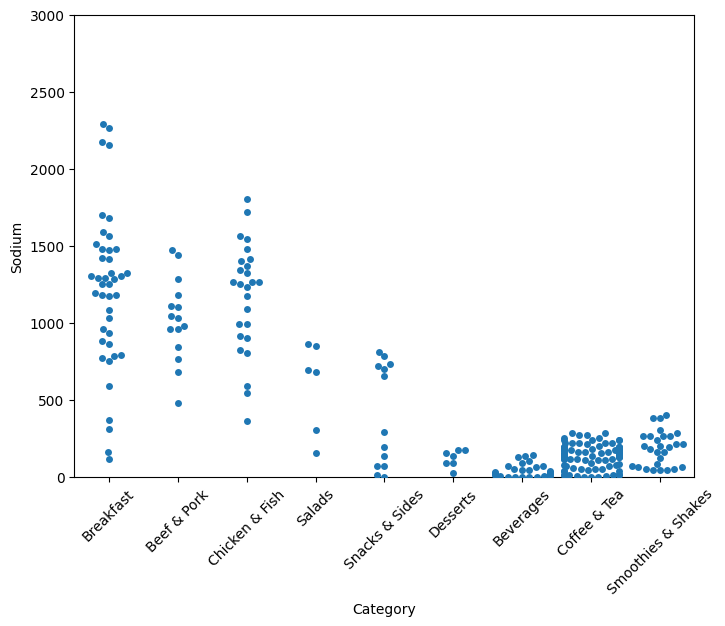

In [151]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Category',
              y='Sodium',
              data=df)
plt.ylim(0,3000) #Đặt giới hạn trục y
plt.xticks(rotation=45) #Xoay label trục x


In [156]:
df.loc[df['Sodium'].idxmax()]
df.loc[[df['Sugars'].idxmax()], ['Category', 'Item', 'Sugars']]
ant = df.groupby(by=['Category', 'Item'], as_index=False)['Sugars'].max().sort_values(by='Sugars', ascending=False)
ant.head(1)



,Category,Item,Sugars
228,Smoothies & Shakes,McFlurry with M&Mâ€™s Candies (Medium),128


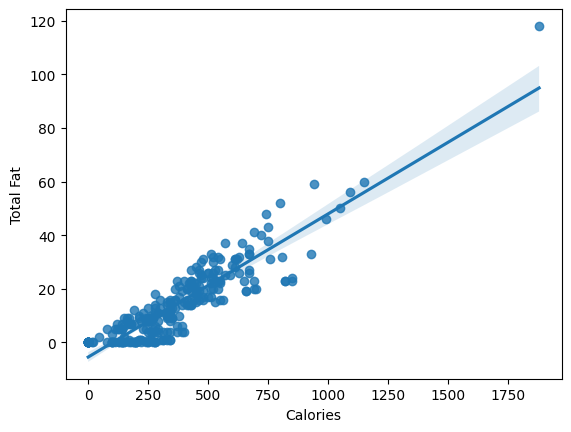

In [153]:
df[['Calories', 'Total Fat']].corr()
df[['Calories', 'Total Fat']]
sns.regplot(x='Calories', y='Total Fat', data=df)
plt.show()